In [1]:
import volume_finder
import MDAnalysis as mda
import MDAnalysis.analysis.align
from MDAnalysis.analysis import align, rms
import trimesh
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

/Users/danielevans/Desktop/work/lau/mda/mda_sept7_2022/.venv/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


3.137708665961229
0.9364649020483383


/Users/danielevans/Desktop/work/lau/mda/mda_sept7_2022/.venv/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/Users/danielevans/Desktop/work/lau/mda/mda_sept7_2022/.venv/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:753: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/Users/danielevans/Desktop/work/lau/mda/mda_sept7_2022/.venv/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'elements' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/danielevans/Desktop/work/lau/mda/mda_sept7_2022/.venv/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


3.2611751510404843
0.705806633142793


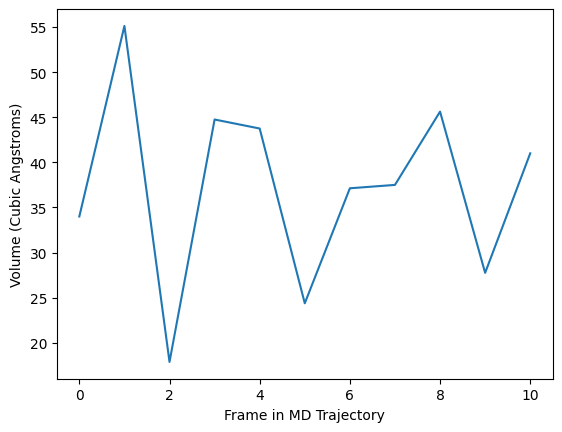

In [2]:
# Complete example
u=mda.Universe("../../povme/test/test_omt.pdb")
prot_atoms = u.select_atoms("protein")

grid_size = 0.5
roi_voxel = volume_finder.volumes.generate_voxelized_sphere(5, u.atoms[1119].position, grid_size)
protein_surf = volume_finder.volumes.ProteinSurface(prot_atoms, solvent_rad=1.09, grid_size=grid_size)
pocket_shape = volume_finder.volumes.voxel_subtract(roi_voxel, protein_surf.surf)

copy_filename = "aligned.pdb"
u_copy = volume_finder.volumes.align_to_pocket(protein_surf, pocket_shape, u,
                                       copy_filename, 0)

protein_in_copy = u_copy.select_atoms("protein")

volumes = []
pockets = []
prots = []

for frame in u_copy.trajectory[0:11]:
    roi_voxel = volume_finder.volumes.generate_voxelized_sphere(5, u.atoms[1119].position, grid_size)
    s = volume_finder.volumes.ProteinSurface(protein_in_copy, solvent_rad=1.09, grid_size=grid_size)
    su = volume_finder.volumes.voxel_subtract(roi_voxel, s.surf)
    volumes.append(su.volume)
    pockets.append(su)
    prots.append(s)

plt.plot(volumes)
plt.xlabel("Frame in MD Trajectory")
plt.ylabel("Volume (Cubic Angstroms)")
plt.show()

In [3]:
pocket_atoms_frame_0, pocket_frame_0 = volume_finder.ops_from_volumes.get_pocket_atoms(prots[0], pockets[0], u, solvent_rad=1.09, grid_size=grid_size)
pocket_atoms_frame_2, pocket_frame_2 = volume_finder.ops_from_volumes.get_pocket_atoms(prots[2], pockets[2], u, solvent_rad=1.09, grid_size=grid_size)
volume_finder.volumes.voxel_subtract(pocket_frame_0.surf, pocket_frame_2.surf).show()

In [4]:
import pyvista as pv

sr = {u_copy.select_atoms("index 1983 1733") : "green",
                       u_copy.select_atoms("segid PROB") : "orange"}


volume_finder.ops_from_volumes.compare_prots(prots[0], prots[1],
                            sel_regions_1={u_copy.select_atoms("index 1983 1733") : "green",
                                           u_copy.select_atoms("segid PROB and resname MET") : "orange"},
                            sel_regions_2={u_copy.select_atoms("index 10 20") : "yellow",
                                           u_copy.select_atoms("segid PROA and resname ALA") : "white"})

2022-11-22 19:41:34.368 Python[6036:289558] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/ns/3vj5l9t51573yvmylknzf4dw0000gn/T/org.python.python.savedState


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

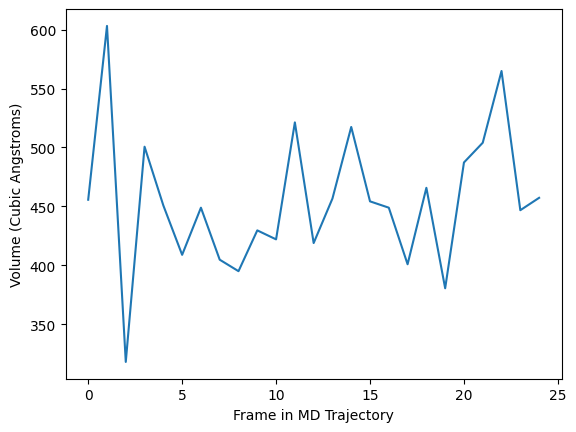

In [5]:
volumes = []
pockets = []
prots = []

grid_size = 0.5
for frame in u_copy.trajectory[0:50]:
    roi_voxel = volume_finder.volumes.generate_voxelized_sphere(10, u_copy.atoms[1119].position, 0.5)
    s = volume_finder.volumes.ProteinSurface(protein_in_copy, solvent_rad=1.09, grid_size=grid_size)
    su = volume_finder.volumes.voxel_subtract(roi_voxel, s.surf)
    volumes.append(su.volume)
    pockets.append(su)
    prots.append(s)

plt.plot(volumes)
plt.xlabel("Frame in MD Trajectory")
plt.ylabel("Volume (Cubic Angstroms)")
plt.show()

In [6]:
pocket_atoms_frame_0, pocket_frame_0 = volume_finder.ops_from_volumes.get_pocket_atoms(prots[0], pockets[0], u_copy, solvent_rad=1.09, grid_size=grid_size)
pocket_atoms_frame_2, pocket_frame_2 = volume_finder.ops_from_volumes.get_pocket_atoms(prots[2], pockets[2], u_copy, solvent_rad=1.09, grid_size=grid_size)
volume_finder.volumes.voxel_subtract(pocket_frame_0.surf, pocket_frame_2.surf).show()

In [7]:
volume_finder.ops_from_volumes.compare_prots(pocket_frame_0, pocket_frame_2, color_1="red",
                            sel_regions_1={u_copy.select_atoms("index 1983") : "orange"},
                                           color_2="blue",
                            sel_regions_2={u_copy.select_atoms("index 1983") : "green"})

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [8]:
dists = volume_finder.ops_from_volumes.compare_frames(0,2, u_copy, prots[0], prots[2], pockets[0], pockets[2], volumes, u_copy.trajectory[0:50])

mean and std dist 1.7173793511710915 1.4705561222200467
outlier 1536 4.656936820881382 103
outlier 1537 5.33475590597546 103
outlier 1541 0.8519112183517242 104
outlier 1548 3.486739786560676 104
outlier 1549 0.26050917187182077 104
outlier 1553 0.6405547137450913 104
outlier 2598 0.6756409326727933 173
outlier 2600 0.6303294985006228 173
outlier 2601 0.40399734943773996 173
outlier 1117 0.26066646461622656 74
outlier 1118 0.2199116734670009 74
outlier 1119 0.11747338663217041 74
outlier 1120 0.19260855487854195 74
outlier 1121 0.1436313890145657 74
outlier 1123 0.3166164358331324 74
outlier 1126 0.4056119108560018 75
outlier 1127 0.5201942902947003 75
outlier 1132 0.17999992767973194 75
outlier 1133 0.14368041155706904 75
outlier 1139 0.2844028617855279 76
outlier 1140 0.30594612215126615 76
outlier 1141 0.5090707559515121 77
outlier 1142 0.46246946633417435 77
outlier 1143 0.7096280252709327 77
outlier 1144 0.7526785936894493 77
outlier 1145 0.7542474277504468 77
outlier 1146 0.61616

In [9]:
volume_finder.ops_from_volumes.show_one_prot(prots[0])

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [10]:
sel_1 = u_copy.select_atoms("segid PROA and resname ALA")
sel_2 = u_copy.select_atoms("segid PROB")
volume_finder.ops_from_volumes.show_one_prot(prots[0], color="blue",
                            sel_regions={sel_1 : "red",
                                         sel_2 : "green"})

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)